**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients. (Total 30 marks)

# Install the necessary libraries (1 mark)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# import data 2C_weka.csv for 2 Class Classifcation. (1 mark)


In [2]:
df = pd.read_csv('2Classdata.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data. (4 marks)

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df.isna().count()

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [6]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


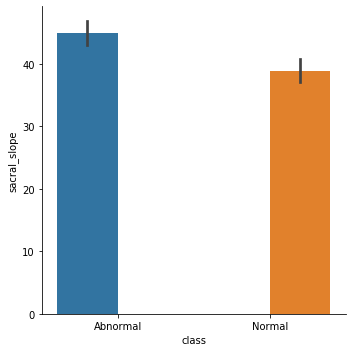

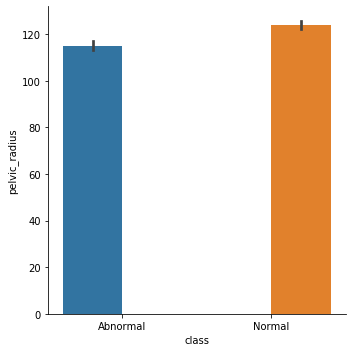

In [8]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

sns.catplot(x='class', y = 'sacral_slope', hue = 'class', kind ='bar', data=df)

sns.catplot(x='class', y = 'pelvic_radius', hue = 'class', kind ='bar', data=df)


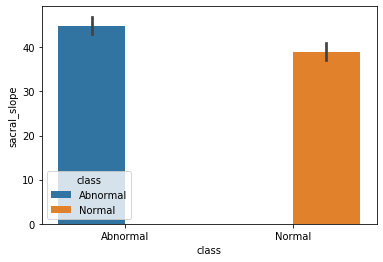

In [9]:
import seaborn as sns

sns.barplot(x='class', y = 'sacral_slope', hue = 'class', data=df)

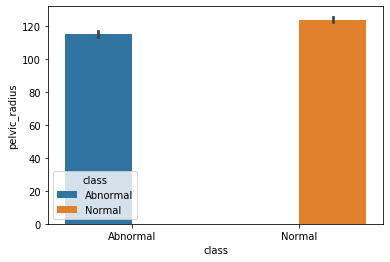

In [10]:
sns.barplot(x='class', y = 'pelvic_radius', hue = 'class', data=df)


# Encode the Class variable to integer. (2 marks)

In [11]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [12]:
df['class']= label_encoder.fit_transform(df['class']) 

In [13]:
df['class'].unique() 

array([0, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [14]:
X=df.drop('class',axis=1)
y=df['class']
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_std

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30. (2 marks)

In [16]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_size, random_state=seed)

In [17]:
X_train.shape

(217, 6)

In [18]:
X_test.shape

(93, 6)

# Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

In [19]:
knn=KNeighborsClassifier() #n_neighbors=5
sc=StandardScaler()

sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

knn.fit(scaledX_train,y_train)
predicted = knn.predict(scaledX_test)

# Calculate the performance score of of your classification on test dataset. (2 marks)
Hint- You can use knn.score( ) function.

In [20]:
print("The Train Accuracy is: ")
print(knn.score(scaledX_train,y_train))

print("The Test Accuracy is: ")
print(knn.score(scaledX_test,y_test))

print('Confusion Matrix')
print(confusion_matrix(y_test,predicted))

The Train Accuracy is: 
0.880184331797235
The Test Accuracy is: 
0.8279569892473119
Confusion Matrix
[[56  3]
 [13 21]]


# What is the best K value for your classifcation?
#Find at which k value you get the best score. (2 marks)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
maxK = int(np.sqrt(X_train.shape[0]))
maxK

14

In [23]:
# creating odd list of K for KNN
myList = list(range(1,20))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.8099002446828534,
 0.7871729719555807,
 0.773734236777715,
 0.7791266704310182,
 0.7973273103707886,
 0.8014398644833427,
 0.8113965744400528,
 0.8018539431582908,
 0.8027009222661396,
 0.806851119894598]

In [24]:
# changing to misclassification error
misError = [1 - x for x in cv_scores]

In [25]:
# determining best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [26]:
NNH = KNeighborsClassifier(n_neighbors=optimal_k)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.8172043010752689

In [27]:
# Confusion matrix
confusion_matrix(y_test, NNH.predict(X_test))

array([[56,  3],
       [14, 20]], dtype=int64)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above. (10 marks)

In [28]:
df1 = pd.read_csv('3Classdata.csv')
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [29]:
df1.isna().count()

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [30]:
df1['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['class']= label_encoder.fit_transform(df1['class']) 
df1['class'].unique() 

array([0, 2, 1], dtype=int64)

In [32]:
X=df1.drop('class',axis=1)
y=df1['class']
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_std
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_size, random_state=seed)
knn=KNeighborsClassifier() #n_neighbors=5
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
predicted = knn.predict(scaledX_test)

print("The Train Accuracy is: ")
print(knn.score(scaledX_train,y_train))

print("The Test Accuracy is: ")
print(knn.score(scaledX_test,y_test))

print('Confusion Matrix')
print(confusion_matrix(y_test,predicted))

The Train Accuracy is: 
0.8571428571428571
The Test Accuracy is: 
0.7741935483870968
Confusion Matrix
[[ 9  2  0]
 [ 9 21  4]
 [ 5  1 42]]


In [37]:
from sklearn.model_selection import cross_val_score
maxK = int(np.sqrt(X_train.shape[0]))
print('The maximum value of k is :',maxK)
# creating odd list of K for KNN
myList = list(range(1,20))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

The maximum value of k is : 14


[0.7685940146809711,
 0.7466760775456428,
 0.7555693581780538,
 0.7553312629399586,
 0.7738104648974213,
 0.7698955392433653,
 0.7788076416337286,
 0.7699360060229625,
 0.7701524562394128,
 0.7792433653303219]

In [38]:
# changing to misclassification error
misError = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d" % optimal_k)
NNH = KNeighborsClassifier(n_neighbors=optimal_k)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)
# Confusion matrix
confusion_matrix(y_test, NNH.predict(X_test))

The optimal number of neighbors is 19


array([[ 8,  1,  2],
       [ 7, 21,  6],
       [ 2,  4, 42]], dtype=int64)